# Simple Linear Regression
1. Exceute cell -> Shift + Enter
2. Convert cell to code - esc, y
3. Conver cell to markdown - esc, m

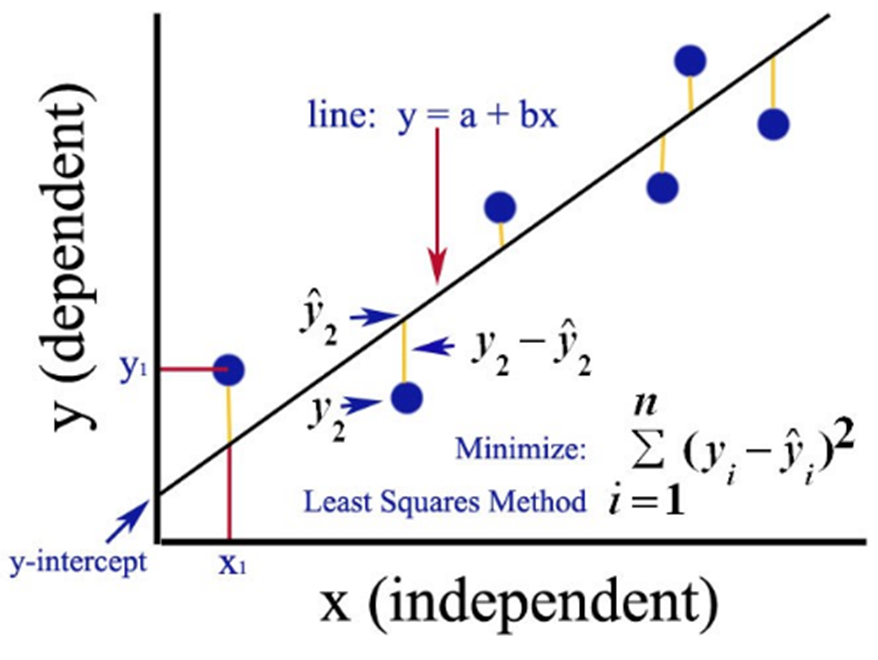

# for 50 startups data estimate the profit

In [24]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data ingestion

In [3]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Target - Profit

# Step 2 - Basic data quality
1. info - df.info()
2. Duplitate - df.duplicated().sum()
3. missing - df.isna().sum()


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

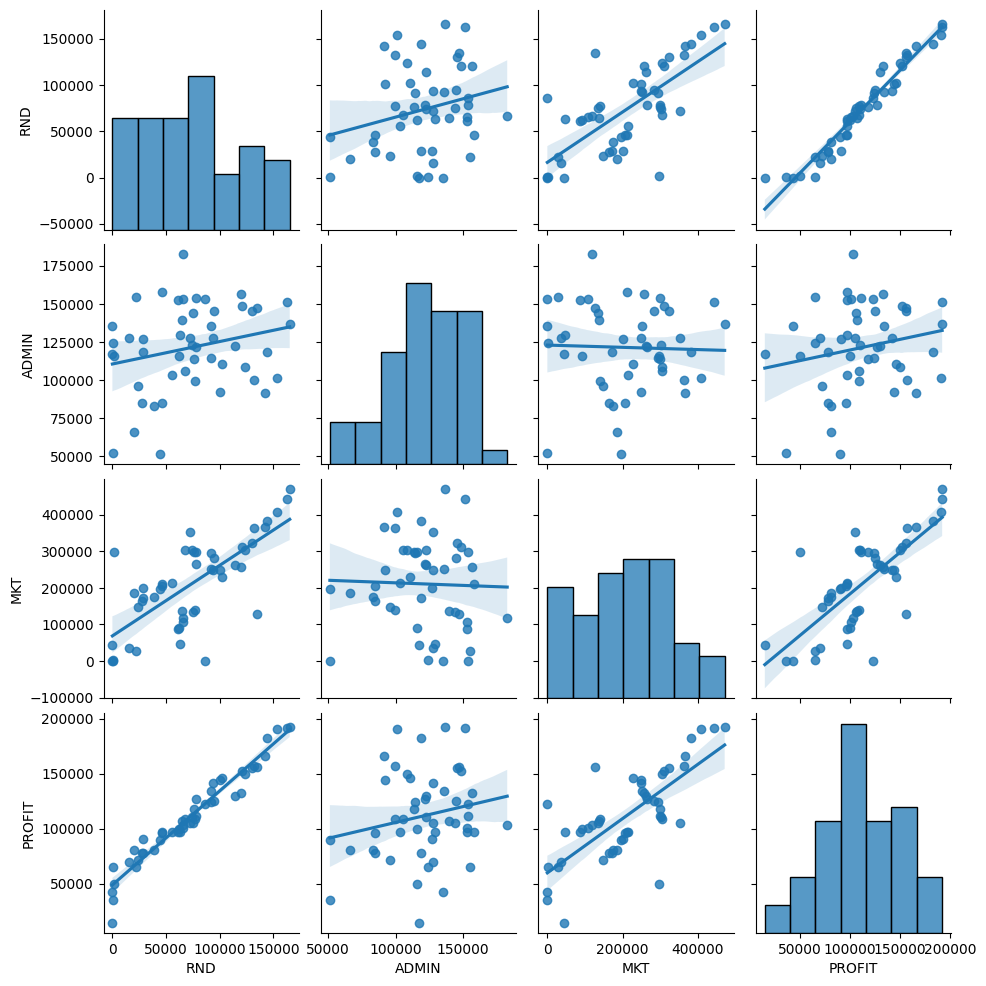

In [6]:
import seaborn as sns
sns.pairplot(data=df, kind="reg")

In [7]:
df.corr(numeric_only=True)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


# RND should be predictor for Profit
# Profit ~ RND
# Profit(Y) = B0 + B1 x RND(X)

# Step 3 - Seperate X(RND), Y(PROFIT)

In [ ]:
X = df[["RND"]] 
Y = df["PROFIT"]

In [10]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [11]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

# Step 4 - Train the model

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
model.intercept_

np.float64(49032.89914125215)

In [14]:
model.coef_

array([0.85429137])

# Profit_pred = 49032.9 + 0.8543 x RND

# Step 5 - Evaluate the model

In [15]:
# R2 score
model.score(X, Y)

0.9465353160804393

In [16]:
ypred = model.predict(X)
ypred[0:5]

array([190289.29389289, 187938.71118575, 180116.65707807, 172369.00320589,
       170433.97345032])

In [17]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

In [18]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [19]:
evaluate_model(model, X, Y)

RMSE : 9226.10
MAE : 6910.98
MAPE : 11.07%
R2 : 94.65%


<Axes: xlabel='RND', ylabel='PROFIT'>

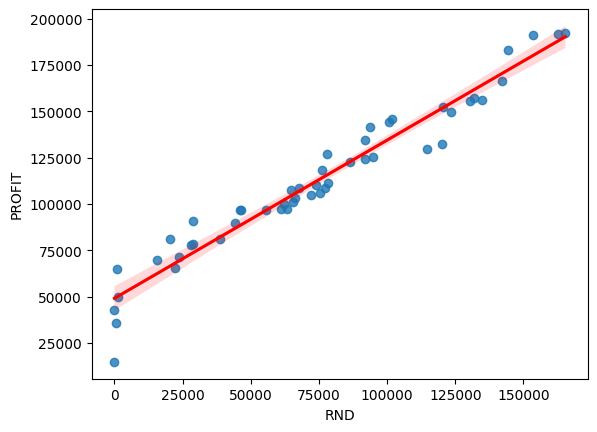

In [20]:
sns.regplot(data=df, x="RND", y="PROFIT", line_kws={"color": "red"})

# Step 6 - Out of Sample prediction (Inference)

In [29]:
rnd = 60_000
profit = model.predict([[rnd]])
print(profit)

[100290.38139758]
